# prophetを使ってみる

## install方法
[prophet Installation](https://facebook.github.io/prophet/docs/installation.html)

## 時系列データの作成
ダミーの時系列データを作成します。

In [101]:
import numpy as np
import pandas as pd
import seaborn as sns
from prophet import Prophet

sns.set(rc={"figure.figsize": (15, 8)})

## タイムスタンプデータを作成

In [102]:
from datetime import datetime as dt
from datetime import timedelta

timestamps = [
    dt.strptime("2018-02-24", "%Y-%m-%d") + timedelta(days=x) for x in range(160)
]

for i in range(5):
    print(timestamps[i])

2018-02-24 00:00:00
2018-02-25 00:00:00
2018-02-26 00:00:00
2018-02-27 00:00:00
2018-02-28 00:00:00


## ダミーの時系列データを作成

In [103]:
data = []
for i, date in enumerate(timestamps):
    weekday = date.weekday()
    month = date.month
    value = month % 3 + weekday * 2

    if weekday > 4:
        value *= 1.4
    elif weekday == 3:
        value *= 0.8
    data.append([date, value])

df = pd.DataFrame(data)
df.columns = ["ds", "y"]

df_first_half = df.iloc[:60, :]
df_latter_half = df.iloc[60:, :]

<AxesSubplot:xlabel='ds', ylabel='y'>

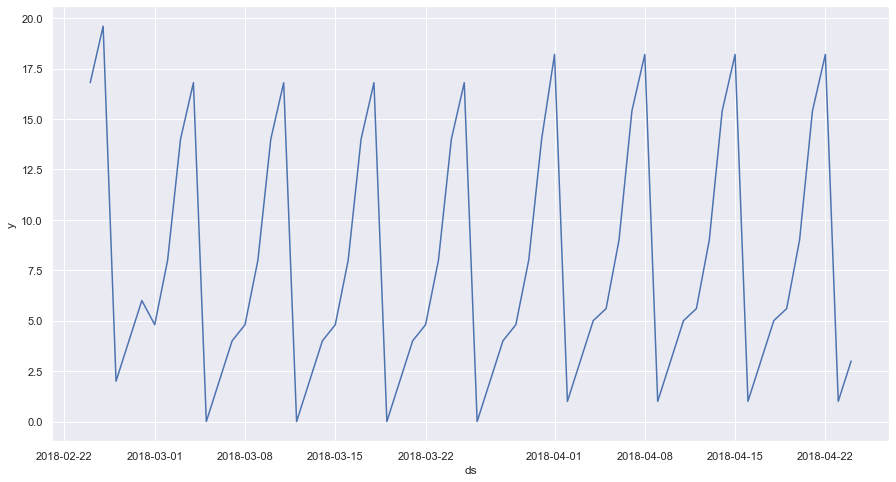

In [104]:
sns.set_theme(style="darkgrid")
sns.lineplot(x="ds", y="y", data=df_first_half)

In [105]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -13.9966


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       458.068   0.000154927        59.124      0.2318      0.2318      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     112       458.486   0.000313448       126.677   2.909e-06       0.001      181  LS failed, Hessian reset 
     147       459.847    0.00110634       169.572   8.421e-06       0.001      258  LS failed, Hessian reset 
     199       460.548   4.89771e-06         65.37      0.4095      0.4095      328   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     238       462.143   0.000272556       100.628    1.37e-06       0.001      435  LS failed, Hessian reset 
     299       462.919   0.000538325        68.835           1           1      509   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     354       463.019   0.000238697  

In [106]:
future = m.make_future_dataframe(periods=7)
forecast = m.predict(future)

<AxesSubplot:xlabel='ds', ylabel='yhat'>

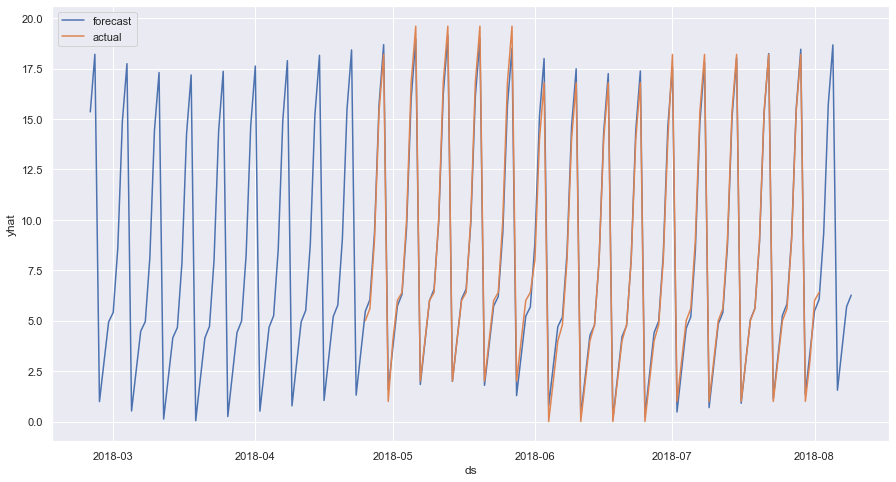

In [107]:
sns.lineplot(x="ds", y="yhat", data=forecast, label="forecast")
sns.lineplot(x="ds", y="y", data=df_latter_half, label="actual")